New Neural Network Architecture

Two components

Encoder (RNN, LSTM, GRU) - Takes the input sequence ('Hello World') and compress it into the fixed size vector that captures the entire sequence

Decoder (RNN, LSTM, GRU) - Based on the fixed size vector from the encoder it generates the output sequence with different language (Bonjour) . takes one token at a time,
                           continue until it produces the stop signal

How it works: The encoder process input sequentially using (RNN/LST/GRU) creating a context vector. The decoder uses this context vector to generate
             the output step by step, with each output depending on the context and previous outputs

This is Called: Seq2Seq Architecture.

Common uses of Seq2Seq:

1. Machine Translation
2. Text Summarization
3. chatbots
4. any task requiring sequence treansformation with different input/output lengths


In [ ]:


from IPython.display import Image
Image(url='https://cdn.analyticsvidhya.com/wp-content/uploads/2024/10/seq2seq-1-1.gif')

Neural Network Architecture


input  - outputs

word - word


one word in english - one word in french

hello - bonjour
travel - voyage


Dataset for MAchine Translation

https://www.manythings.org/anki/

https://www.manythings.org/anki/fra-eng.zip





In [ ]:
!wget https://www.manythings.org/anki/fra-eng.zip

--2025-07-06 06:45:36--  https://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8143096 (7.8M) [application/zip]
Saving to: ‘fra-eng.zip.3’

fra-eng.zip.3       100%[===================>]   7.77M  4.51MB/s    in 1.7s    

2025-07-06 06:45:39 (4.51 MB/s) - ‘fra-eng.zip.3’ saved [8143096/8143096]



In [ ]:
#!unzip fra-eng.zip

Archive:  fra-eng.zip
replace _about.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls -a

.   _about.txt	   .config	fra-eng.zip.1  fra-eng.zip.3  sample_data
..  best_model.h5  fra-eng.zip	fra-eng.zip.2  fra.txt


In [ ]:
# prompt: display first 10 lines in fra.txt


In [ ]:
# prompt: print how many records in fra.txt


In [ ]:
!head -n 10 fra.txt

Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
Go.	Marche.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)
Go.	En route !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)
Go.	Bouge !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)
Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)
Hi.	Salut.	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #4320462 (gillux)
Run!	Cours !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906331 (sacredceltic)
Run!	Courez !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906332 (sacredceltic)
Run!	Prenez vos jambes à vos cous !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2077449 (sacredceltic)
Run!	File !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2077454 (sacredceltic)


In [ ]:
!wc -l fra.txt

237838 fra.txt


# Load the Data

In [ ]:
# prompt: Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
# Go.	Marche.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)
# Go.	En route !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8267435 (felix63)
# Go.	Bouge !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)
# Hi.	Salut !	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #509819 (Aiji)
# Hi.	Salut.	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #4320462 (gillux)
# Run!	Cours !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906331 (sacredceltic)
# Run!	Courez !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906332 (sacredceltic)
# Run!	Prenez vos jambes à vos cous !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2077449 (sacredceltic)
# Run!	File !	CC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #2077454 (sacredceltic)
# i need to read the fra.txt and i need to create two variable
# 1. fr
# 2. eng
# where each variable should have a array of respective language from the txt where index 0 is inglish and index 1 is french

eng = []
fr = []

with open('fra.txt', 'r', encoding='utf-8') as f:
  for line in f:
    # Split the line by the tab character to separate English and French
    parts = line.strip().split('\t')
    if len(parts) >= 2:
      eng.append(parts[0])
      fr.append(parts[1])

# You can verify by printing the first few elements
# print(eng[:10])
# print(fr[:10])

In [ ]:
eng[:10], fr[:10]

(['Go.', 'Go.', 'Go.', 'Go.', 'Hi.', 'Hi.', 'Run!', 'Run!', 'Run!', 'Run!'],
 ['Va !',
  'Marche.',
  'En route !',
  'Bouge !',
  'Salut !',
  'Salut.',
  'Cours\u202f!',
  'Courez\u202f!',
  'Prenez vos jambes à vos cous !',
  'File !'])

# Preprocess the Data

In [ ]:
# prompt: can you write a simple text preprocessing like punctuation, make it in lower case and also remove uncessary space

import re

def preprocess_text(text):
  text = text.lower()  # Convert to lowercase
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  text = re.sub(r'\s+', ' ', text).strip()  # Remove unnecessary spaces and strip
  return text

# Apply preprocessing to the lists
eng_processed = [preprocess_text(text) for text in eng]
fr_processed = [preprocess_text(text) for text in fr]

print("Processed English:")
print(eng_processed[:10])
print("\nProcessed French:")
print(fr_processed[:10])


Processed English:
['go', 'go', 'go', 'go', 'hi', 'hi', 'run', 'run', 'run', 'run']

Processed French:
['va', 'marche', 'en route', 'bouge', 'salut', 'salut', 'cours', 'courez', 'prenez vos jambes à vos cous', 'file']


# Viewing sentence length

In [ ]:
# prompt: can you print the min and max size of both english and french variable separately

# Find the length of each sentence in the English and French processed lists
eng_lengths = [len(sentence.split()) for sentence in eng_processed]
fr_lengths = [len(sentence.split()) for sentence in fr_processed]

# Print the minimum and maximum lengths for English
print(f"English - Minimum sentence length: {min(eng_lengths)}, Maximum sentence length: {max(eng_lengths)}")

# Print the minimum and maximum lengths for French
print(f"French - Minimum sentence length: {min(fr_lengths)}, Maximum sentence length: {max(fr_lengths)}")

English - Minimum sentence length: 1, Maximum sentence length: 55
French - Minimum sentence length: 1, Maximum sentence length: 56


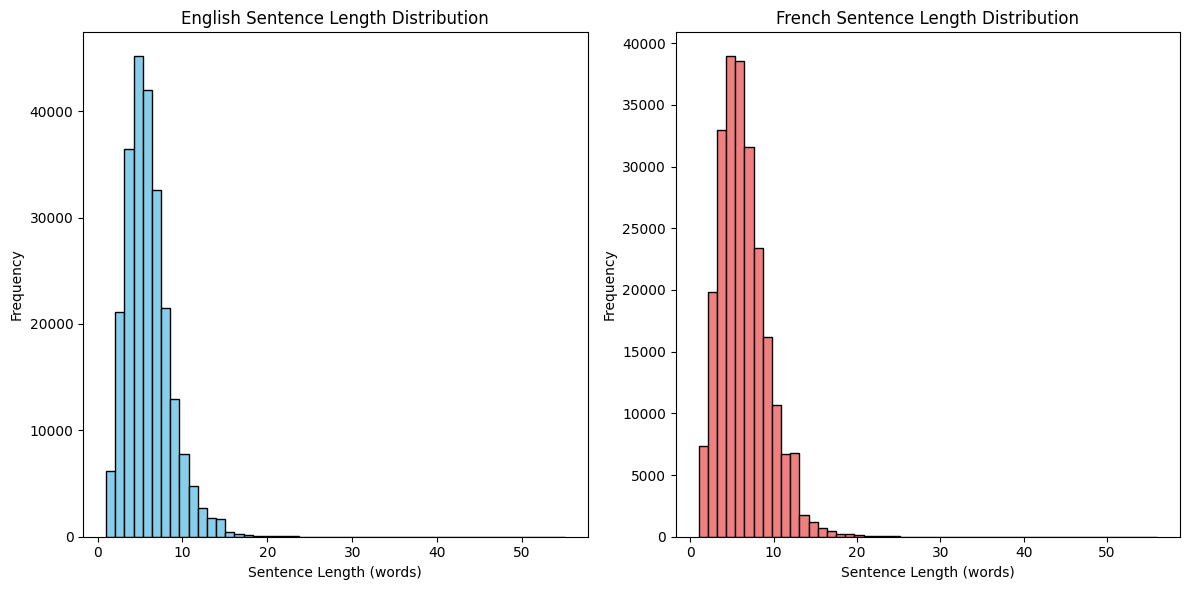

In [ ]:
# prompt: can you draw the size distribution of both english and french

import matplotlib.pyplot as plt

# Plot the size distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(eng_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('English Sentence Length Distribution')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(fr_lengths, bins=50, color='lightcoral', edgecolor='black')
plt.title('French Sentence Length Distribution')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: can you check how many sentences are there with less than 20 words in english

# Count the number of English sentences with less than 20 words
short_eng_sentences_count = sum(1 for length in eng_lengths if length > 20)

print(f"Number of English sentences with less than 20 words: {short_eng_sentences_count}")

Number of English sentences with less than 20 words: 170


In [ ]:
# Lets Keep as it is!

# Coverting the Text to Sequence of Numbers

In [ ]:
# prompt: Convert the text to sequence of numbers
# 1. use the keras  tokenizer o fitontext and also print the vocab size both in english and french separately

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize English sentences
eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(eng_processed)
eng_sequences = eng_tokenizer.texts_to_sequences(eng_processed)

# Tokenize French sentences
fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(fr_processed)
fr_sequences = fr_tokenizer.texts_to_sequences(fr_processed)

# Print vocabulary sizes
print("English Vocabulary Size:", len(eng_tokenizer.word_index))
print("French Vocabulary Size:", len(fr_tokenizer.word_index))

# You can optionally pad the sequences to have uniform length
# eng_padded_sequences = pad_sequences(eng_sequences, padding='post')
# fr_padded_sequences = pad_sequences(fr_sequences, padding='post')

English Vocabulary Size: 17220
French Vocabulary Size: 33608


In [ ]:
eng_processed[:10]

['go', 'go', 'go', 'go', 'hi', 'hi', 'run', 'run', 'run', 'run']

In [ ]:
eng_sequences[:10]

[[44], [44], [44], [44], [2640], [2640], [417], [417], [417], [417]]

In [ ]:
fr_processed[:10]

['va',
 'marche',
 'en route',
 'bouge',
 'salut',
 'salut',
 'cours',
 'courez',
 'prenez vos jambes à vos cous',
 'file']

In [ ]:
fr_sequences[:10]

[[99],
 [764],
 [20, 609],
 [2718],
 [4021],
 [4021],
 [523],
 [6781],
 [672, 198, 1822, 6, 198, 13206],
 [2682]]

# Train test split

In [ ]:
# prompt: can you split the english and french data with first 10000 record and train and remaining as test on eng_sequences and fr_sequences

# Define the split point
split_point = 10000

# Split the data into training and testing sets
eng_sequences_train = eng_sequences[:split_point]
eng_sequences_test = eng_sequences[split_point:]

fr_sequences_train = fr_sequences[:split_point]
fr_sequences_test = fr_sequences[split_point:]

print(f"English Training set size: {len(eng_sequences_train)}")
print(f"English Testing set size: {len(eng_sequences_test)}")
print(f"French Training set size: {len(fr_sequences_train)}")
print(f"French Testing set size: {len(fr_sequences_test)}")

English Training set size: 10000
English Testing set size: 227838
French Training set size: 10000
French Testing set size: 227838


In [ ]:
eng_sequences_train[700:900]

[[19, 1099],
 [19, 1977],
 [19, 1977],
 [19, 174],
 [19, 1109],
 [19, 1109],
 [19, 1109],
 [19, 469],
 [19, 763],
 [19, 763],
 [19, 763],
 [19, 466],
 [19, 466],
 [19, 466],
 [19, 560],
 [19, 560],
 [19, 522],
 [19, 522],
 [19, 310],
 [19, 72],
 [19, 72],
 [19, 114],
 [19, 224],
 [19, 1353],
 [19, 1353],
 [19, 1353],
 [19, 1353],
 [19, 254],
 [19, 254],
 [19, 2010],
 [19, 2010],
 [19, 598],
 [19, 483],
 [19, 421],
 [19, 119],
 [19, 119],
 [19, 119],
 [19, 119],
 [19, 764],
 [19, 1887],
 [19, 3762],
 [19, 3762],
 [19, 1641],
 [19, 1641],
 [19, 1641],
 [19, 1686],
 [19, 109],
 [19, 109],
 [74, 816],
 [74, 816],
 [11, 1978],
 [11, 1373],
 [11, 568],
 [11, 568],
 [42, 6],
 [42, 350],
 [42, 350],
 [42, 43],
 [42, 43],
 [42, 468],
 [42, 159],
 [42, 159],
 [42, 1868],
 [42, 558],
 [42, 790],
 [202, 64],
 [202, 64],
 [693, 6],
 [693, 6],
 [804, 6],
 [153, 11],
 [153, 11],
 [153, 11],
 [153, 11],
 [153, 11],
 [153, 15],
 [153, 87],
 [153, 87],
 [133, 44],
 [133, 44],
 [133, 44],
 [133, 44],
 [1

# Pad the sequence of text to make sure they are uniform in length

In [ ]:
# prompt: # Pad the sequence of text to make sure they are uniform in length based on max length of the data set accordingly
# use the keras padsquence with post padding
# use the max length of respective variable in padding and do the padding for train and test for both english and french
# the max length should be found from whole data set rather than finding it separately in train and test
# note: we have already found the max lenth from below code
# # Find the length of each sentence in the English and French processed lists
# eng_lengths = [len(sentence.split()) for sentence in eng_processed]
# fr_lengths = [len(sentence.split()) for sentence in fr_processed]

# Determine the overall maximum length for English and French sequences
max_eng_length = max(eng_lengths)
max_fr_length = max(fr_lengths)

print(f"Overall Max English Sequence Length: {max_eng_length}")
print(f"Overall Max French Sequence Length: {max_fr_length}")

# Pad the train and test sequences using the overall max lengths and post padding
eng_train_padded = pad_sequences(eng_sequences_train, maxlen=max_eng_length, padding='post')
fr_train_padded = pad_sequences(fr_sequences_train, maxlen=max_fr_length, padding='post')
eng_test_padded = pad_sequences(eng_sequences_test, maxlen=max_eng_length, padding='post')
fr_test_padded = pad_sequences(fr_sequences_test, maxlen=max_fr_length, padding='post')

print("\nShape of padded English train data:", eng_train_padded.shape)
print("Shape of padded French train data:", fr_train_padded.shape)
print("Shape of padded English test data:", eng_test_padded.shape)
print("Shape of padded French test data:", fr_test_padded.shape)

Overall Max English Sequence Length: 55
Overall Max French Sequence Length: 56

Shape of padded English train data: (10000, 55)
Shape of padded French train data: (10000, 56)
Shape of padded English test data: (227838, 55)
Shape of padded French test data: (227838, 56)


In [ ]:
eng_train_padded[:1]

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0]], dtype=int32)

In [ ]:
fr_train_padded[:1]

array([[99,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

# Build the seq2seq Model Architecture

In [ ]:
# prompt: I want you to create a seq2seq amodel architecture for machine tranlsation where my input is english and output is french
# 1. Input is english and it should be embedded with an embedding length of 512 dimension
# 2. Encode to be with LSTM layer with LSTM units of 512
# 3. have a repeat vector vector to pass it on to the decoding layer
# 4. Decoding layer as LSTM with 512 units
# 5.i want the dense layer with eng vocab size with softmax activstion and compile it with best optimizer and lass function
# can you write the simple straight forward keras function for seq2seq model

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, RepeatVector

def build_seq2seq_model(english_vocab_size, french_vocab_size, embedding_dim=512, lstm_units=512, eng_max_len=None, fr_max_len=None):
    # Encoder
    encoder_inputs = Input(shape=(eng_max_len,), name="encoder_input")
    encoder_embedding = Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, name="embedding")(encoder_inputs)
    encoder_output = LSTM(units=lstm_units, name="encoder_lstm")(encoder_embedding)

    # Repeat vector
    repeated = RepeatVector(fr_max_len, name="repeat_vector")(encoder_output)

    # Decoder
    decoder_lstm = LSTM(units=lstm_units, return_sequences=True, name="decoder_lstm")(repeated)
    decoder_dense = Dense(units=french_vocab_size, activation="softmax", name="output")(decoder_lstm)

    # Model
    model = Model(inputs=encoder_inputs, outputs=decoder_dense)

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage (assuming you have calculated vocab sizes and max lengths)
english_vocab_size = len(eng_tokenizer.word_index) + 1  # Add 1 for padding
french_vocab_size = len(fr_tokenizer.word_index) + 1    # Add 1 for padding
# Use the max lengths determined from the data
eng_max_len = max_eng_length
fr_max_len = max_fr_length

model = build_seq2seq_model(english_vocab_size, french_vocab_size, eng_max_len=eng_max_len, fr_max_len=fr_max_len)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 55)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 55, 512)        │     8,817,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_lstm (LSTM)             │ (None, 512)            │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 56, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_lstm (LSTM)             │ (None, 56, 512)        │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 56, 33609)      │    17,241,417 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,256,969 (115.42 MB)

 Trainable params: 30,256,969 (115.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print("Is GPU available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Is GPU available: True


# Train the model

In [ ]:
# prompt: can you fit the model with appropriate input and output with train and test for validation and add callback with model checkpoint on save the best model and early stopping if necessary and make the batch size of 512 and epoch of 50, validation split of 0.1 and verbose of 1

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )
    # tf.keras.callbacks.EarlyStopping(
    #     monitor='val_loss',
    #     patience=3,  # Number of epochs with no improvement after which training will be stopped.
    #     mode='min',
    #     verbose=1
    # )
]

history = model.fit(
    eng_train_padded,
    fr_train_padded,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.9274 - loss: 1.5119
Epoch 1: val_loss improved from inf to 0.44968, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 57s 187ms/step - accuracy: 0.9275 - loss: 1.5089 - val_accuracy: 0.9404 - val_loss: 0.4497
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9509 - loss: 0.3644
Epoch 2: val_loss improved from 0.44968 to 0.44119, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 59s 211ms/step - accuracy: 0.9509 - loss: 0.3644 - val_accuracy: 0.9404 - val_loss: 0.4412
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.9508 - loss: 0.3544
Epoch 3: val_loss did not improve from 0.44119
282/282 ━━━━━━━━━━━━━━━━━━━━ 76s 188ms/step - accuracy: 0.9508 - loss: 0.3544 - val_accuracy: 0.9404 - val_loss: 0.4420
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9505 - loss: 0.3489
Epoch 4: val_loss improved from 0.44119 to 0.43620, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 54s 191ms/step - accuracy: 0.9505 - loss: 0.3489 - val_accuracy: 0.9400 - val_loss: 0.4362
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9506 - loss: 0.3440
Epoch 5: val_loss did not improve from 0.43620
282/282 ━━━━━━━━━━━━━━━━━━━━ 81s 189ms/step - accuracy: 0.9506 - loss: 0.3440 - val_accuracy: 0.9404 - val_loss: 0.4407


In [ ]:
history

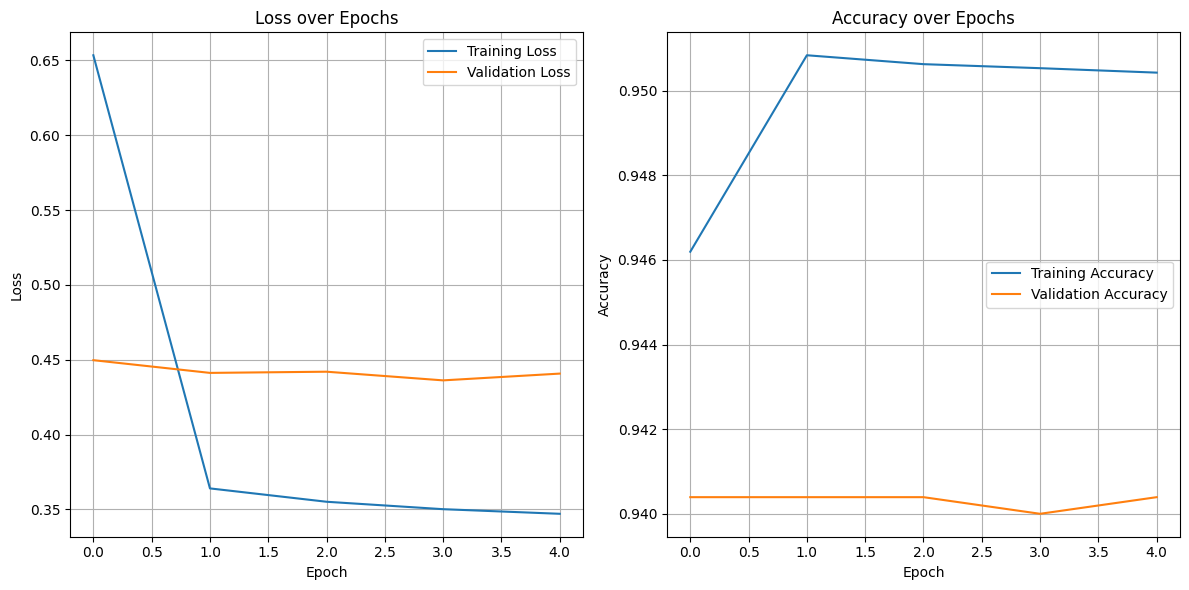

In [ ]:
# prompt: draw the plot for history

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Text Generator

In [ ]:
# prompt: now we have a model can you write a utility function to generate the text sequence based on the output prediction sequence

def sequence_to_text(sequence, tokenizer):
  """
    Converts a sequence of token IDs back to text.

    Args:
        sequence (list): A list or numpy array of token IDs.
        tokenizer (Tokenizer): The Keras Tokenizer object used for text tokenization.

    Returns:
        str: The reconstructed text sequence.
  """
  reverse_word_index = dict([(id, word) for word, id in tokenizer.word_index.items()])
  # Filter out padding (0) if it's in the sequence
  text = ' '.join([reverse_word_index.get(i, '') for i in sequence if i > 0])
  return text

In [ ]:
# prompt: can you predict using the model on train first 100 data and validate using Bleu score

!pip install sacrebleu

from sacrebleu.metrics import BLEU

# Predict on the first 100 samples of the training data
train_predictions = model.predict(eng_train_padded[:100])

# Convert predictions (numerical sequences) to text
# The predictions are probability distributions over the vocabulary for each time step.
# We need to find the index with the highest probability for each step to get the predicted token ID.
predicted_sequences = [tf.argmax(pred, axis=-1).numpy() for pred in train_predictions]
predicted_text = [sequence_to_text(seq, fr_tokenizer) for seq in predicted_sequences]

# Get the actual target text for the first 100 samples of the training data
actual_sequences = fr_train_padded[:100]
actual_text = [sequence_to_text(seq, fr_tokenizer) for seq in actual_sequences]

# Calculate BLEU score
# sacrebleu expects a list of references for each hypothesis.
# Since we have one reference per prediction, we wrap the actual_text list in another list.
bleu = BLEU()
bleu_score = bleu.corpus_score(predicted_text, [actual_text])

print("Predicted Text (first 10 samples):")
for i in range(100):
    print(f"Input: {sequence_to_text(eng_train_padded[i], eng_tokenizer)}")
    print(f"Actual: {actual_text[i]}")
    print(f"Predicted: {predicted_text[i]}\n")

print(f"BLEU score on the first 100 training samples: {bleu_score.score}")
print(f"BLEU score details: {bleu_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
Predicted Text (first 10 samples):
Input: go
Actual: va
Predicted: je

Input: go
Actual: marche
Predicted: je

Input: go
Actual: en route
Predicted: je

Input: go
Actual: bouge
Predicted: je

Input: hi
Actual: salut
Predicted: je

Input: hi
Actual: salut
Predicted: je

Input: run
Actual: cours
Predicted: je

Input: run
Actual: courez
Predicted: je

Input: run
Actual: prenez vos jambes à vos cous
Predicted: je

Input: run
Actual: file
Predicted: je

Input: run
Actual: filez
Predicted: je

Input: run
Actual: cours
Predicted: je

Input: run
Actual: fuyez
Predicted: je

Input: run
Actual: fuyons
Predicted: je

Input: run
Actual: cours
Predicted: je

Input: run
Actual: courez
Predicted: je

Input: run
Actual: prenez vos jambes à vos cous
Predicted: je

Input: run
Actual: file
Predicted: je

Input: run
Actual: filez
Predicted: je

Input: run
Actual: cours
Predicted: je

Input: run
Actual: fuyez
Predicted: je

Input: run
Actual: fuyons
Predicted: je

Inp

In [ ]:
len(predictions)

#we have predicted for first 10 train input = len(predictions)
#each sentence french length = 56 = len(predictions[0])
#french vocabulary length = 33609 = len(predictions[0][0])

10

In [ ]:
predicted_sequences, predicted_texts

(array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0,

In [ ]:

## 🔤 What is BLEU Score?

The **BLEU score** is a metric to **evaluate the quality of machine-translated text** by comparing it to one or more **reference translations** (i.e., human-translated sentences).

Think of it like asking:
**"How close is the machine’s translation to a human’s?"**

---

## 🧠 Simple Idea

It checks:

* **How many words or phrases (n-grams)** from the machine translation also appear in the human reference.
* And penalizes if the machine translation is **too short**.

---

## 🧩 Step-by-Step Explanation

### 🔹 Step 1: Tokenize the Sentences

Break both the **candidate translation** (machine output) and **reference translation** (human translation) into tokens (words).

---

### 🔹 Step 2: Match n-grams

For **n = 1 to 4**:

* Extract n-grams (e.g., unigrams, bigrams, trigrams, 4-grams).
* Count how many n-grams from the candidate match those in the reference.

🔸 Example:

* Reference: `"the cat is on the mat"`
* Candidate: `"the cat the cat on the mat"`

Unigrams (n=1) in candidate:
`["the", "cat", "the", "cat", "on", "the", "mat"]`

Unigrams in reference:
`["the", "cat", "is", "on", "the", "mat"]`

Matched unigrams = `["the", "cat", "on", "the", "mat"]`

Apply **clipping**: you count each matching word **only as many times** as it appears in the reference.

---

### 🔹 Step 3: Calculate Precision for Each n-gram

For each n (1 to 4):

$$
P_n = \frac{\text{Number of matched n-grams}}{\text{Total n-grams in candidate}}
$$

These are **modified precisions**.

---

### 🔹 Step 4: Geometric Mean of Precisions

Combine the n-gram precisions using the **geometric mean**:

$$
\text{BLEU}_{\text{no BP}} = \exp\left( \sum_{n=1}^{N} w_n \log P_n \right)
$$

Usually, $w_n = \frac{1}{4}$ for n = 1 to 4 (equal weights).

---

### 🔹 Step 5: Brevity Penalty (BP)

To prevent short translations from cheating by matching fewer words.

$$
BP = \begin{cases}
1 & \text{if } c > r \\
e^{(1 - \frac{r}{c})} & \text{if } c \le r
\end{cases}
$$

Where:

* $c$ = length of candidate
* $r$ = length of reference

If the machine's output is **too short**, BLEU is **penalized**.

---

### 🔹 Step 6: Final BLEU Score

$$
\text{BLEU} = BP \times \exp\left( \sum_{n=1}^{N} w_n \log P_n \right)
$$

---

## 🧪 Example Calculation

Let’s say:

* Reference: `"the cat is on the mat"`
* Candidate: `"the cat on mat"`

#### Step 1: Tokenize

* Candidate length $c = 4$
* Reference length $r = 6$

#### Step 2: 1-gram match = `["the", "cat", "on", "mat"]` → 4/4 = 1.0

2-gram match = `["the cat", "cat on", "on mat"]` → Only `["on mat"]` matches → 1/3 = 0.33

#### Step 3: Modified Precisions:

* $P_1 = 1.0$
* $P_2 = 1/3$

#### Step 4: Brevity Penalty:

Since $c < r$,

$$
BP = \exp(1 - \frac{6}{4}) = \exp(-0.5) \approx 0.606
$$

#### Step 5: Final BLEU Score (simplified for 1-2 grams only):

$$
\text{BLEU} = 0.606 \times \exp\left( \frac{1}{2}(\log(1) + \log(1/3)) \right)
= 0.606 \times \exp\left( \frac{1}{2} (0 - 1.0986) \right)
= 0.606 \times \exp(-0.5493) \approx 0.606 \times 0.577 = 0.349
$$

✅ BLEU Score ≈ **0.35**

---

## ✅ Summary Table

| Component        | What it does                                     |
| ---------------- | ------------------------------------------------ |
| n-gram precision | Measures exact match of 1–4 word phrases         |
| Clipping         | Prevents word overcounting                       |
| Geometric mean   | Combines all precisions fairly                   |
| Brevity penalty  | Punishes very short translations                 |
| Final BLEU       | Combines precision and brevity for overall score |

---

## 🧠 When is BLEU useful?

* Comparing models (higher is better)
* Evaluating MT systems automatically
* Benchmarking against human translation quality

---

